In [3]:
# For Audio Preprocessing
import librosa
import librosa.display as dsp
from IPython.display import Audio

# For Data Preprocessing
import pandas as pd
import numpy as np
import os

# For data viz
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [4]:
sns.set_style("dark")

In [5]:
def get_audio(digit=0):
    # Audio Sample Directory
    sample = np.random.randint(1,60)
    # Index of Audio
    index = np.random.randint(1,5)
    
    # Modified file location
    if sample<10:
        file = f"data/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"data/{sample}/{digit}_{sample}_{index}.wav"

    # Get Audio from the location
    data,sample_rate = librosa.load(file)
    
    # Plot the audio wave
    dsp.waveshow(data,sr=sample_rate, color='g')
    plt.show()
    
    # Show the widget
    return Audio(data=data,rate=sample_rate)

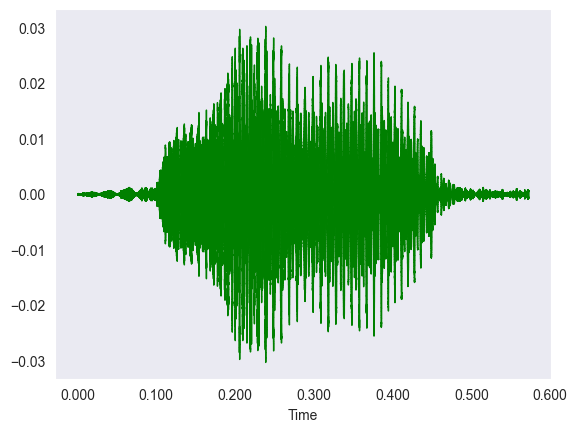

In [6]:
# Show the audio and plot of digit 0
get_audio(0)


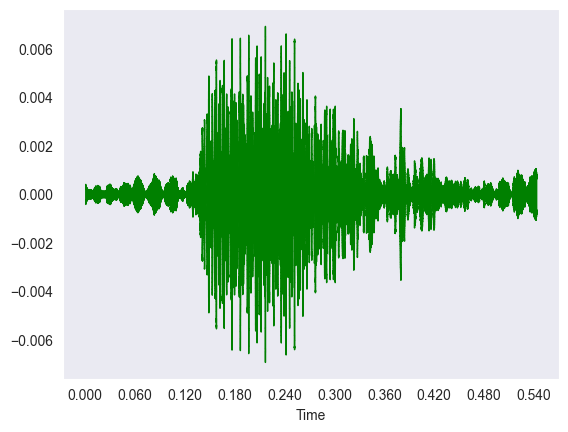

In [7]:
get_audio(1)

In [15]:
def get_audio_raw(digit=0):
    # Audio Sample Directory
    sample = np.random.randint(1,60)
    # Index of Audio
    index = np.random.randint(1,5)
    
    # Modified file location
    if sample<10:
        file = f"data/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"data/{sample}/{digit}_{sample}_{index}.wav"

    
    # Get Audio from the location
    data,sample_rate = librosa.load(file)

    # Return audio
    return data,sample_rate

In [16]:
def spectogram_of(digit):
    # Read the audio file
    data,sr = get_audio_raw(digit)
    # Apply Short-Time-Fourier-Transformer to transform data
    D = librosa.stft(data)
    # Converting frequency to decible
    S_db = librosa.amplitude_to_db(np.abs(D),ref=np.max)
    # Plot the transformed data
    librosa.display.specshow(S_db,x_axis='time',y_axis='log')
    plt.show()

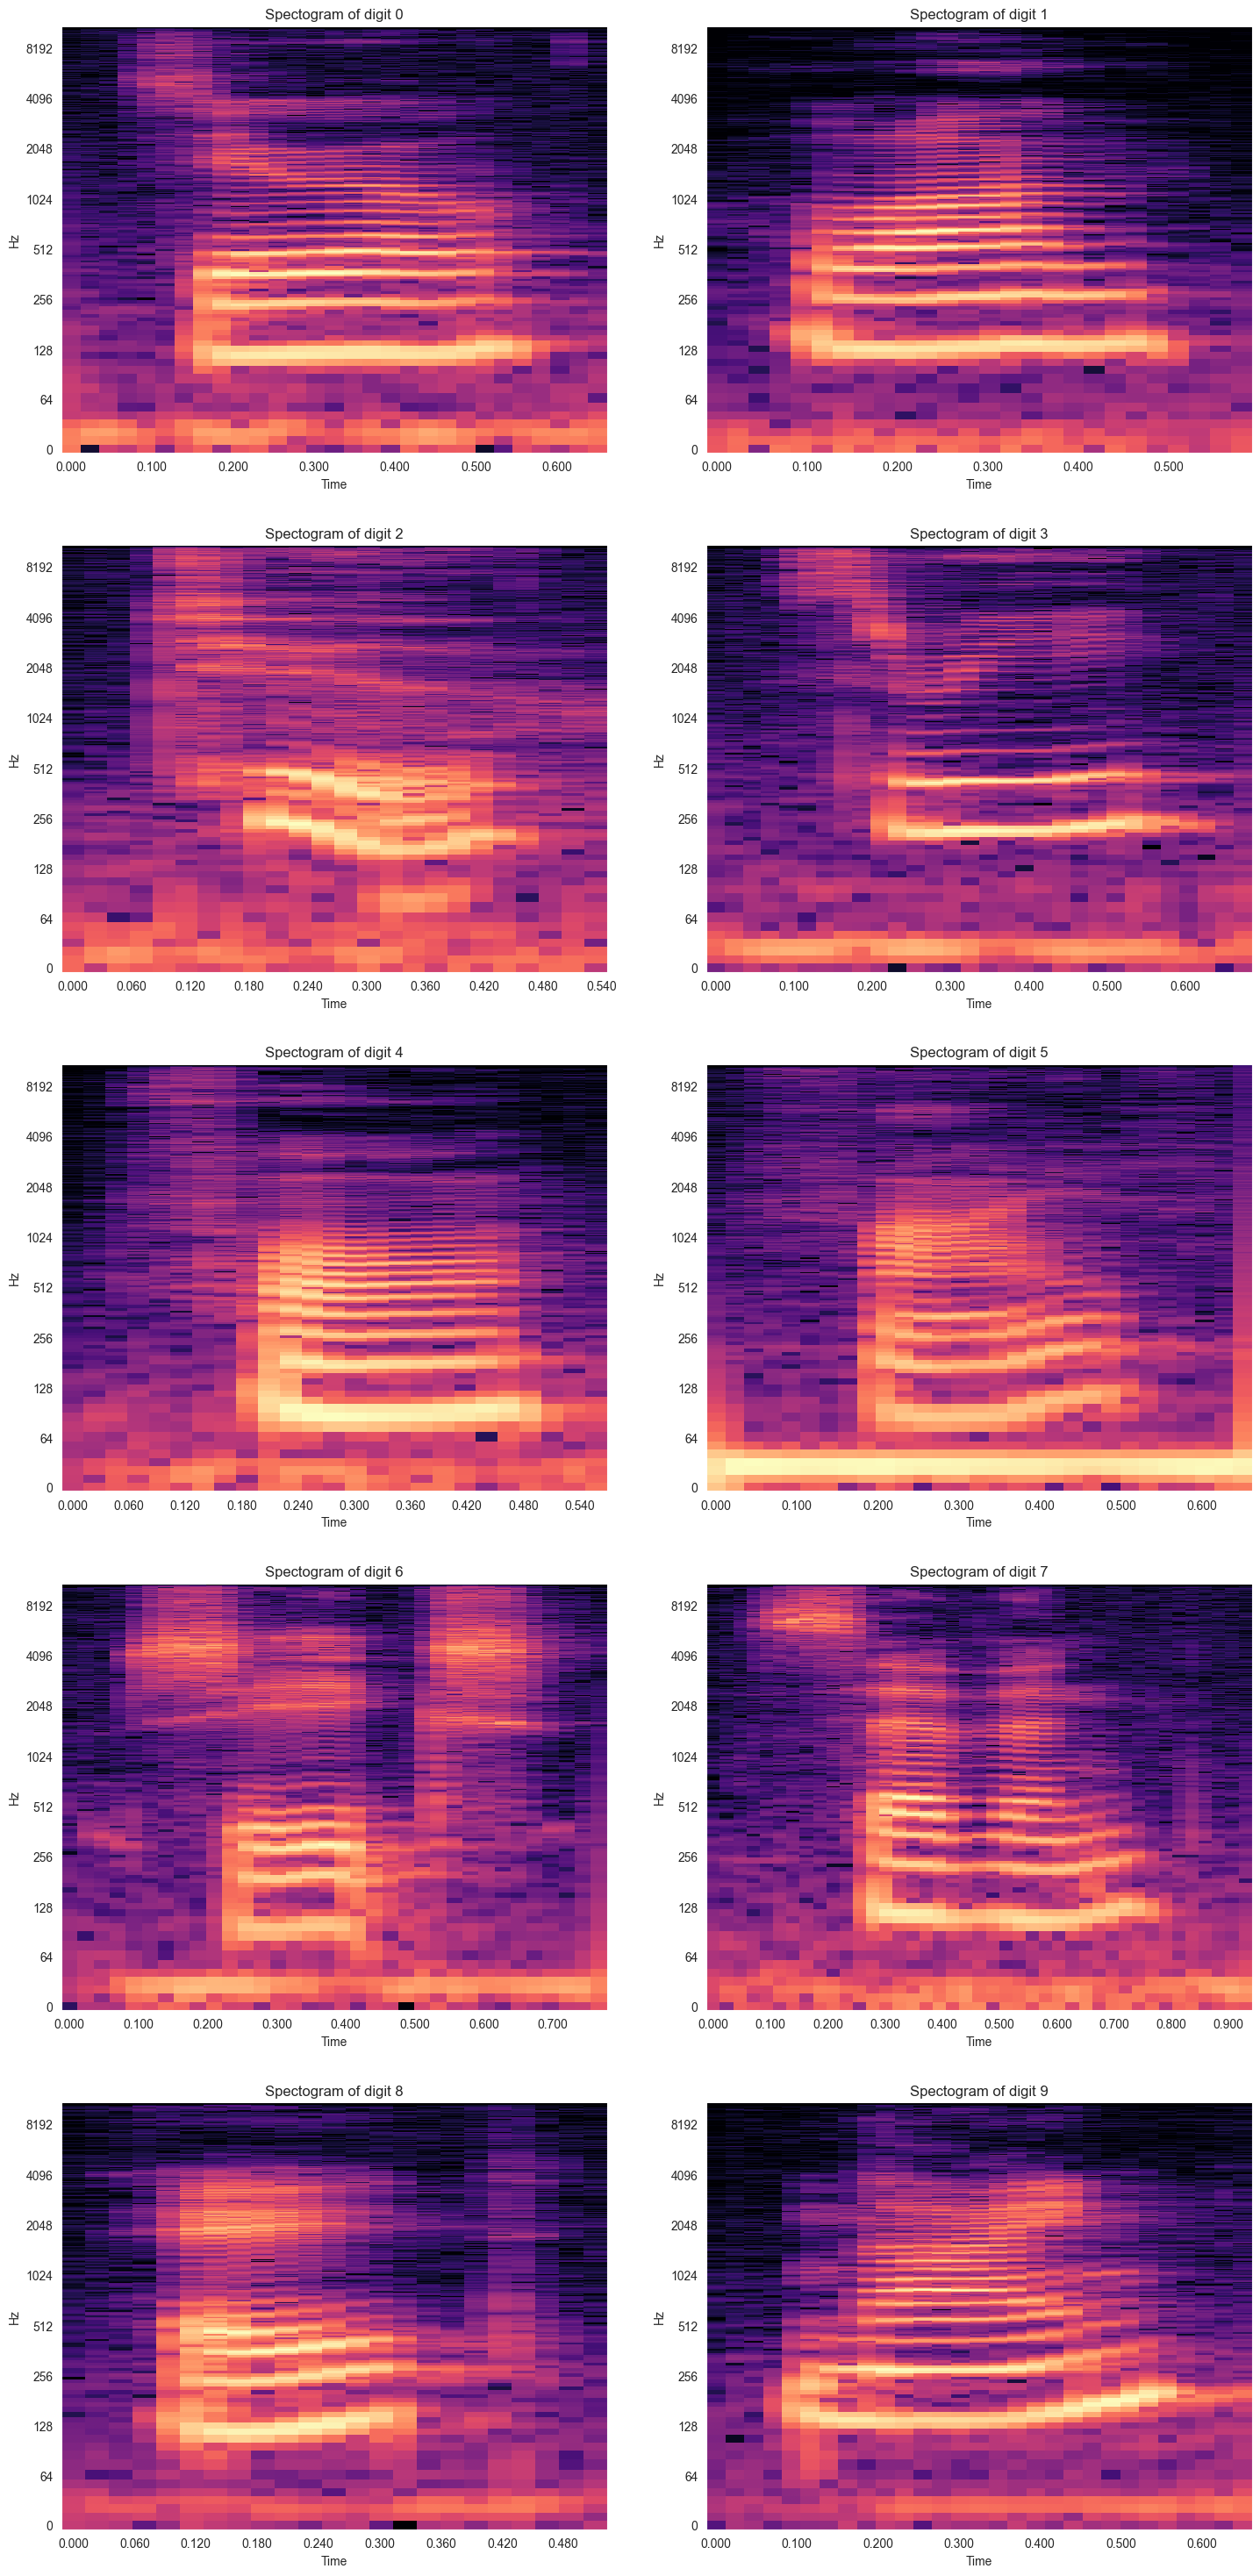

In [17]:
# Creating subplots
fig,ax = plt.subplots(5,2,figsize=(15,30))
# Initializing row and column variables for subplots
row = 0
column = 0

for digit in range(10):  
    # Read the audio file
    data,sr = get_audio_raw(digit)
    # Apply Short-Time-Fourier-Transformer to transform data
    D = librosa.stft(data)
    # Converting frequency to decible
    S_db = librosa.amplitude_to_db(np.abs(D),ref=np.max)
    # Plot the transformed data
    ax[row,column].set_title(f"Spectogram of digit {digit}")
    librosa.display.specshow(S_db,x_axis='time',y_axis='log',ax=ax[row,column])
    # Conditions for positioning of the plots
    if column == 1:
        column = 0
        row += 1
    else:
        column+=1
    
plt.tight_layout(pad=3)   
plt.show()

In [18]:
 #will take a audio file as input and output extracted features using MEL_FREQUENCY CEPSTRAL COEFFICIENT
def extract_features(file):
    # Load audio and sample rate of audio
    audio,sample_rate = librosa.load(file)
    # Extract features using mel-frequency coefficient
    extracted_features = librosa.feature.mfcc(y=audio,
                                              sr=sample_rate,
                                              n_mfcc=40)
    
    # Scale the extracted features
    extracted_features = np.mean(extracted_features.T,axis=0)
    # Return the extracted features
    return extracted_features


def preprocess_and_create_dataset():
    # Path of folder where the audio files are present
    root_folder_path = "data/"
    # Empth List to create dataset
    dataset = []
    
    # Iterating through folders where each folder has audio of each digit
    for folder in tqdm(range(1,61),colour='green'):
        if folder<10:
            # Path of the folder
            folder = os.path.join(root_folder_path,"0"+str(folder))
        else:
            folder = os.path.join(root_folder_path,str(folder))
            
        # Iterate through each file of the present folder
        for file in tqdm(os.listdir(folder),colour='blue'):
            # Path of the file
            abs_file_path = os.path.join(folder,file)
            # Pass path of file to extracted_features() function to create features
            extracted_features = extract_features(abs_file_path) 
            # Class of the audio,i.e., the digit it represents
            class_label = file[0]
            
            # Append a list where the feature represents a column and class of the digit represents another column
            dataset.append([extracted_features,class_label])
    
    # After iterating through all the folder convert the list to a dataframe
    print("Extracted Features and Created Dataset Successfully !!")
    return pd.DataFrame(dataset,columns=['features','class'])

In [19]:
dataset = preprocess_and_create_dataset()

100%|██████████| 60/60 [04:28<00:00,  4.47s/it]

Extracted Features and Created Dataset Successfully !!


In [20]:
# View the head of the dataframe
dataset.head()

features class
0  [-617.90826, 101.58977, 9.847578, 26.403582, 2...     0
1  [-636.50385, 104.66348, 18.785162, 32.96664, 3...     0
2  [-600.72955, 100.82433, 3.3068752, 20.44151, 2...     0
3  [-591.3263, 110.81089, 2.8627224, 20.75193, 25...     0
4  [-619.8362, 97.7517, 19.811028, 26.886065, 20....     0

In [21]:
dataset['class'] = [int(x) for x in dataset['class']]

In [16]:
# Check the frequency of classes of audio
dataset['class'].value_counts()

class
0    3000
1    3000
2    3000
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: count, dtype: int64

In [22]:
# A function which return MFCC
def extract_features_without_scaling(audio_data,sample_rate):
    # Extract features using mel-frequency coefficient
    extracted_features = librosa.feature.mfcc(y=audio_data,
                                              sr=sample_rate,
                                              n_mfcc=40)
    
    # Return Without Scaling
    return extracted_features

Shape of MFCC of audio digit 0 --->  (40, 39)
Shape of MFCC of audio digit 1 --->  (40, 25)
Shape of MFCC of audio digit 2 --->  (40, 21)
Shape of MFCC of audio digit 3 --->  (40, 24)
Shape of MFCC of audio digit 4 --->  (40, 23)
Shape of MFCC of audio digit 5 --->  (40, 37)
Shape of MFCC of audio digit 6 --->  (40, 33)
Shape of MFCC of audio digit 7 --->  (40, 38)
Shape of MFCC of audio digit 8 --->  (40, 26)
Shape of MFCC of audio digit 9 --->  (40, 30)


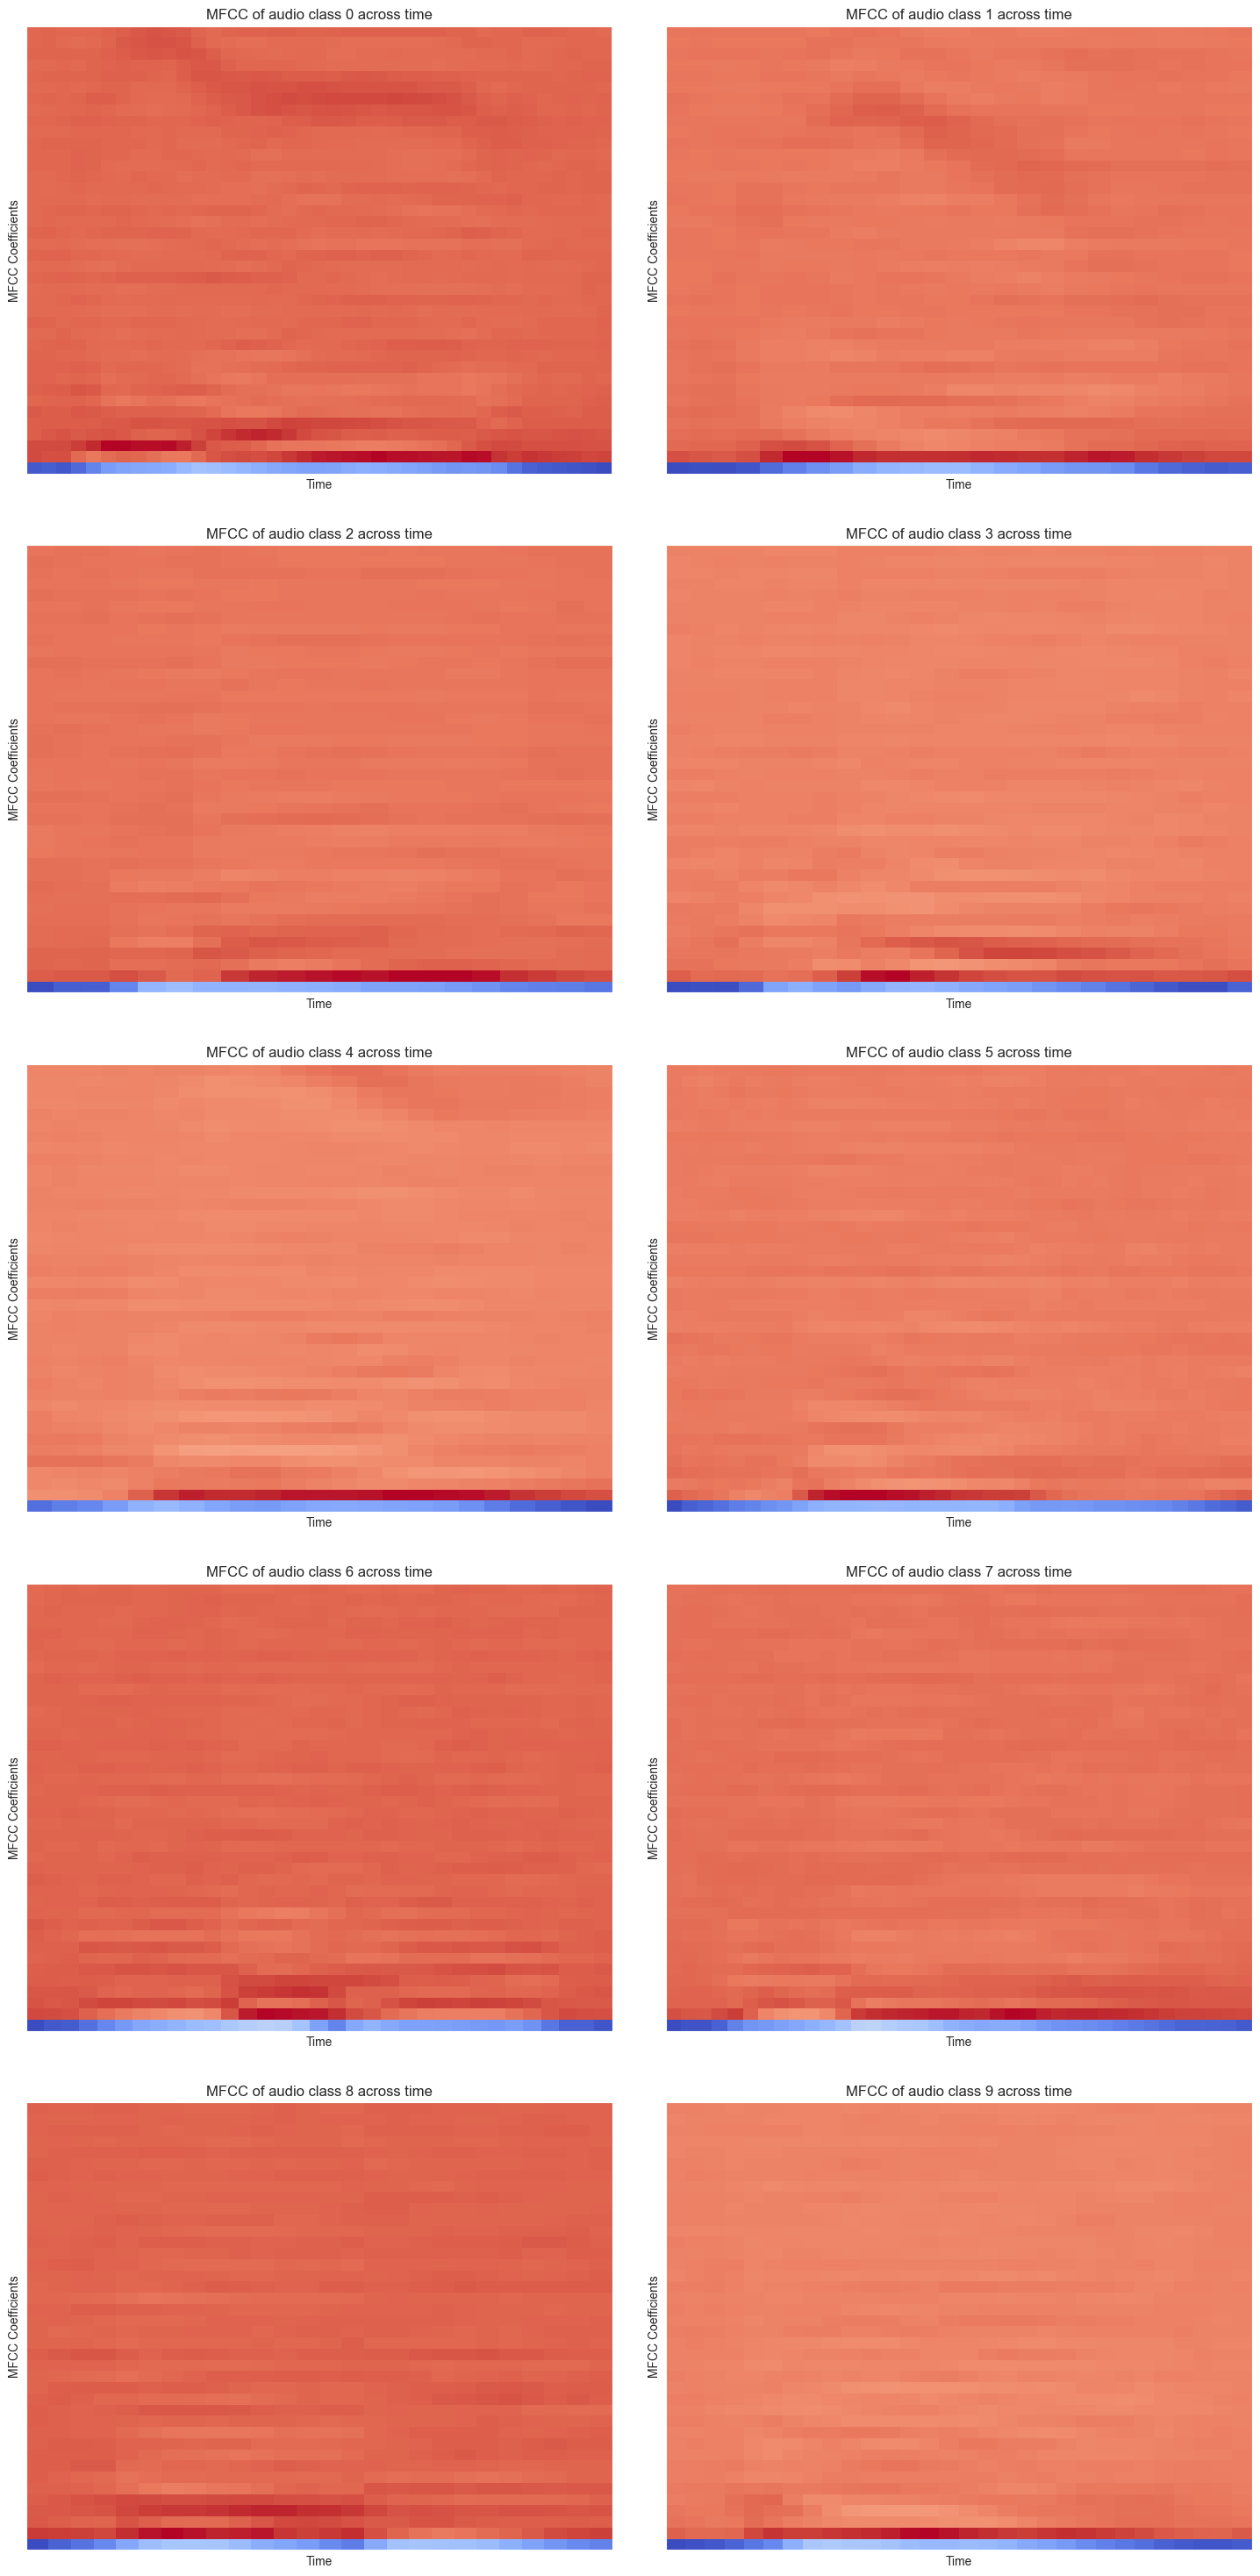

In [23]:
# Creating subplots
fig,ax = plt.subplots(5,2,figsize=(15,30))

# Initializing row and column variables for subplots
row = 0
column = 0

for digit in range(10):  
    # Get Audio of different class(0-9)
    audio_data,sample_rate = get_audio_raw(digit)
    
    # Extract Its MFCC
    mfcc = extract_features_without_scaling(audio_data,sample_rate)
    print(f"Shape of MFCC of audio digit {digit} ---> ",mfcc.shape)
    
    # Display the plots and its title
    ax[row,column].set_title(f"MFCC of audio class {digit} across time")
    librosa.display.specshow(mfcc,sr=22050,ax=ax[row,column])
    
    # Set X-labels and y-labels
    ax[row,column].set_xlabel("Time")
    ax[row,column].set_ylabel("MFCC Coefficients")
    
    # Conditions for positioning of the plots
    if column == 1:
        column = 0
        row += 1
    else:
        column+=1
        
    
plt.tight_layout(pad=3)   
plt.show()

In [24]:
# Import Train Test Split
from sklearn.model_selection import train_test_split
# Seperate the audio and its class as X and Y
X = np.array(dataset['features'].to_list())
Y = np.array(dataset['class'].to_list())

# Create train set and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,shuffle=True,random_state=8)

In [25]:
# Chekcing the shape of the data
X_train.shape

(22500, 40)

In [26]:
# Import create an ANN
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K

# To create a checkpoint and save the best model
from tensorflow.keras.callbacks import ModelCheckpoint

# To load the model
from tensorflow.keras.models import load_model

# To check the metrics of the model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [27]:
# Crete a Sequential Object
model = Sequential()
# Add first layer with 100 neurons to the sequental object
model.add(Dense(100,input_shape=(40,),activation='relu'))
# Add second layer with 200 neurons to the sequental object
model.add(Dense(100,activation='relu'))
# Add third later with 100 neurons to the sequental object
model.add(Dense(100,activation='relu'))

# Output layer With 10 neurons as it has 10 classes
model.add(Dense(10,activation='softmax'))


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 25310 (98.87 KB)
Trainable params: 25310 (98.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [30]:

# Set the number of epochs for training
num_epochs = 100
# Set the batch size for training
batch_size = 32

# Fit the model
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=num_epochs,batch_size=batch_size,verbose=1)

Epoch 1/100
704/704 [==============================] - 2s 2ms/step - loss: 1.6547 - accuracy: 0.6524 - val_loss: 0.5830 - val_accuracy: 0.7845
Epoch 2/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.8212 - val_loss: 0.4747 - val_accuracy: 0.8308
Epoch 3/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4118 - accuracy: 0.8525 - val_loss: 0.3330 - val_accuracy: 0.8783
Epoch 4/100
704/704 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8737 - val_loss: 0.3192 - val_accuracy: 0.8779
Epoch 5/100
704/704 [==============================] - 1s 2ms/step - loss: 0.3079 - accuracy: 0.8913 - val_loss: 0.3589 - val_accuracy: 0.8743
Epoch 6/100
704/704 [==============================] - 1s 2ms/step - loss: 0.2649 - accuracy: 0.9056 - val_loss: 0.2549 - val_accuracy: 0.9067
Epoch 7/100
704/704 [==============================] - 1s 1ms/step - loss: 0.2444 - accuracy: 0.9144 - val_loss: 0.2122 - val_accuracy: 0.9208

In [31]:
# Make predictions on test set
Y_pred = model.predict(X_test)
Y_pred = [np.argmax(i) for i in Y_pred]

235/235 [==============================] - 0s 899us/step


In [32]:
# Print the metrics
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       747
           1       1.00      0.91      0.95       738
           2       0.97      0.97      0.97       772
           3       0.97      0.96      0.96       760
           4       0.99      1.00      0.99       758
           5       0.99      0.99      0.99       703
           6       1.00      0.99      1.00       734
           7       0.99      0.97      0.98       759
           8       0.97      0.98      0.97       754
           9       0.92      0.99      0.95       775

    accuracy                           0.97      7500
   macro avg       0.97      0.97      0.97      7500
weighted avg       0.97      0.97      0.97      7500


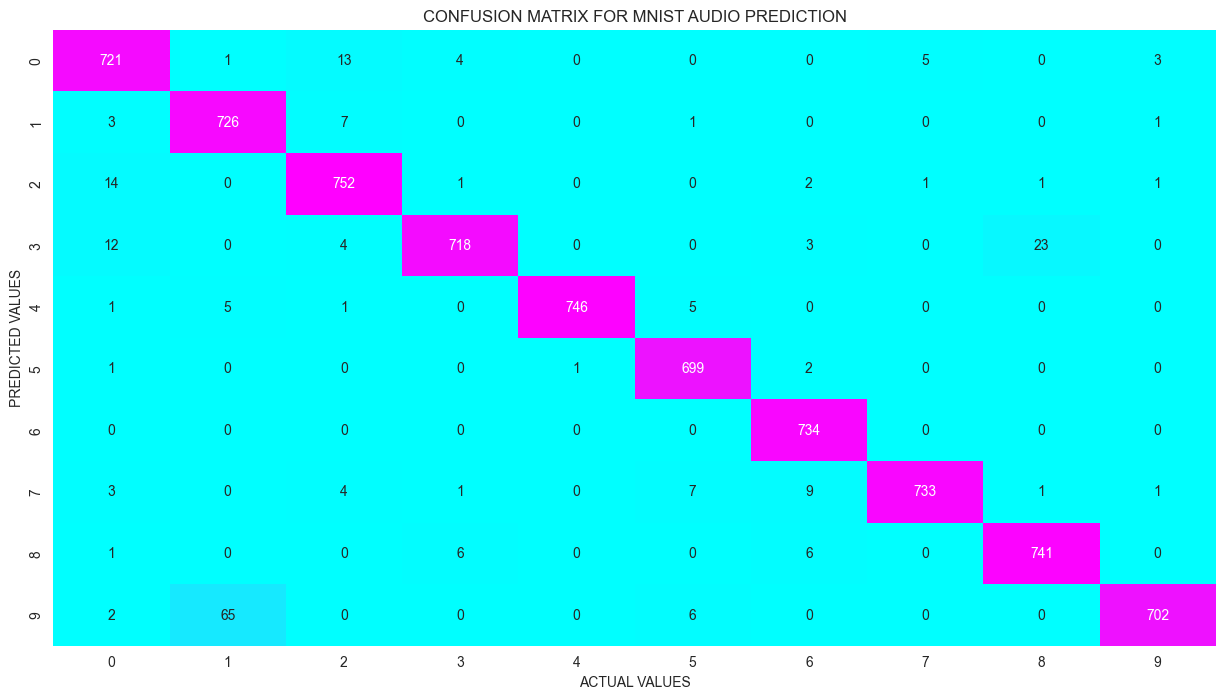

In [29]:
# Set style as dark
sns.set_style("dark")
# Set figure size
plt.figure(figsize=(15,8))

# Plot the title
plt.title("CONFUSION MATRIX FOR MNIST AUDIO PREDICTION")
# Confusion matrix
cm = confusion_matrix([int(x) for x in Y_test],Y_pred)
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap="cool", fmt='g', cbar=False)
# Set x-label and y-label
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

# Plot the plot
plt.show()